In [231]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import datasets
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.tree import plot_tree

import category_encoders as ce
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, mean_squared_error
from sklearn.metrics import r2_score

Регрессия

In [232]:
data= pd.read_csv('Dataset3_fil.csv')

In [233]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4413 entries, 0 to 4412
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        4413 non-null   int64  
 1   price             4413 non-null   float64
 2   area              4413 non-null   float64
 3   latitude          4413 non-null   float64
 4   longitude         4413 non-null   float64
 5   Bedrooms          4413 non-null   float64
 6   Bathrooms         4413 non-null   float64
 7   Balcony           4413 non-null   float64
 8   Status            4413 non-null   object 
 9   neworold          4413 non-null   object 
 10  parking           4413 non-null   float64
 11  Furnished_status  4413 non-null   object 
 12  Lift              4413 non-null   float64
 13  type_of_building  4413 non-null   object 
dtypes: float64(9), int64(1), object(4)
memory usage: 482.8+ KB


In [234]:
data.head(5)

,Unnamed: 0,price,area,latitude,longitude,Bedrooms,Bathrooms,Balcony,Status,neworold,parking,Furnished_status,Lift,type_of_building
0,0,22400000.0,629.0,19.032800,72.896357,2.0,2.0,0.0,Under Construction,New Property,0.0,Unfurnished,0.0,Flat
1,1,35000000.0,974.0,19.032800,72.896357,3.0,2.0,0.0,Under Construction,New Property,0.0,Unfurnished,0.0,Flat
2,2,31700000.0,968.0,19.085600,72.909277,3.0,3.0,0.0,Under Construction,New Property,0.0,Unfurnished,0.0,Flat
3,3,18700000.0,629.0,19.155756,72.846862,2.0,2.0,2.0,Ready to Move,New Property,2.0,Unfurnished,2.0,Flat
4,4,13500000.0,1090.0,19.177555,72.849887,2.0,2.0,0.0,Ready to Move,New Property,0.0,Unfurnished,0.0,Flat


In [235]:
float_to_int = {"Bedrooms", "Bathrooms", "Balcony", "parking", "Lift"}
for field in float_to_int: 
    data[field] = data[field].astype(int)

dict_neworold = {"New Property": True, "Resale": False}
data["neworold"] = data["neworold"].map(dict_neworold)

dict_status = {"Ready to Move": True, "Under Construction": False}
data["Status"] = data["Status"].map(dict_status)

dict_furnished = {"Semi-Furnished": 0.5, "Furnished": 1, "Unfurnished": 0} 
data["Furnished_status"] = data["Furnished_status"].map(dict_furnished)


In [236]:
numeric_data = data.select_dtypes(exclude='object')
object_data = data.select_dtypes(include='object')
data_objects_dummies = pd.get_dummies(object_data)
data_fil = pd.concat([numeric_data,data_objects_dummies], axis=1)
data_fil

,Unnamed: 0,price,area,latitude,longitude,Bedrooms,Bathrooms,Balcony,Status,neworold,parking,Furnished_status,Lift,type_of_building_Flat,type_of_building_Individual House
0,0,22400000.0,629.0,19.032800,72.896357,2,2,0,False,True,0,0.0,0,1,0
1,1,35000000.0,974.0,19.032800,72.896357,3,2,0,False,True,0,0.0,0,1,0
2,2,31700000.0,968.0,19.085600,72.909277,3,3,0,False,True,0,0.0,0,1,0
3,3,18700000.0,629.0,19.155756,72.846862,2,2,2,True,True,2,0.0,2,1,0
4,4,13500000.0,1090.0,19.177555,72.849887,2,2,0,True,True,0,0.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4408,6250,19500000.0,810.0,19.138320,72.810020,2,2,0,True,False,0,0.5,0,1,0
4409,6251,22000000.0,1400.0,19.221920,72.854250,3,3,1,True,False,1,0.0,1,1,0
4410,6252,20000000.0,750.0,19.144320,72.824111,2,2,0,True,False,0,0.0,0,1,0
4411,6253,11000000.0,700.0,19.047201,72.872225,2,2,0,True,False,0,1.0,0,1,0


In [237]:
Y = data_fil["price"]
X = data_fil.drop(["price"],axis=1)

In [238]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)
X_train.shape, X_test.shape

((3530, 14), (883, 14))

In [239]:
Tree_regressor = DecisionTreeRegressor()
Tree_regressor.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='squared_error', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      random_state=None, splitter='best')

In [240]:
y_hat = Tree_regressor.predict(X_train)
r2_score(y_train, y_hat)

1.0

In [241]:
y_pred = Tree_regressor.predict(X_test)
r2_score(y_test, y_pred)

0.41757031711428827

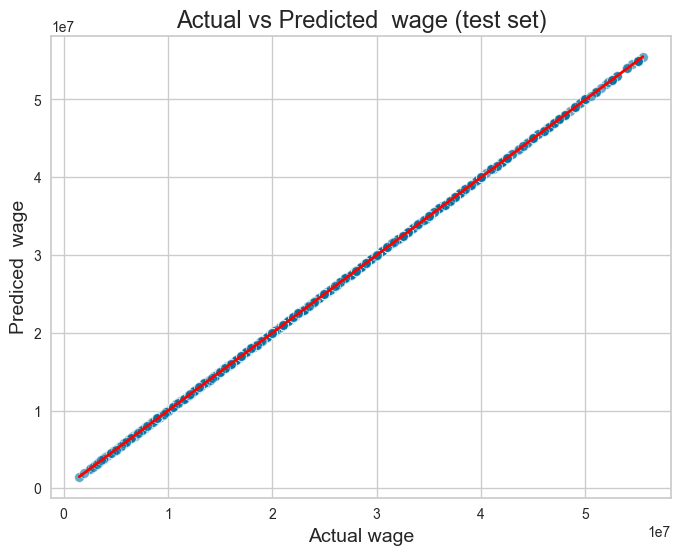

In [242]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_train, y=y_hat, alpha=0.6)
sns.lineplot(x=y_train, y=y_train, color='red', linewidth=2)
plt.xlabel('Actual wage', fontsize=14)
plt.ylabel('Prediced  wage', fontsize=14)
plt.title('Actual vs Predicted  wage (test set)', fontsize=17)
plt.show()

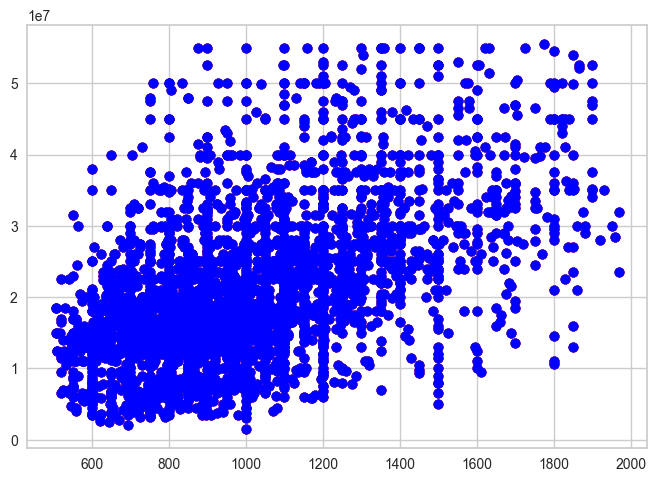

In [243]:
fig, ax = plt.subplots()
ax.scatter(X_train['area'],y_train, color = "red")

ax.scatter(X_train['area'],y_hat, color = "blue")

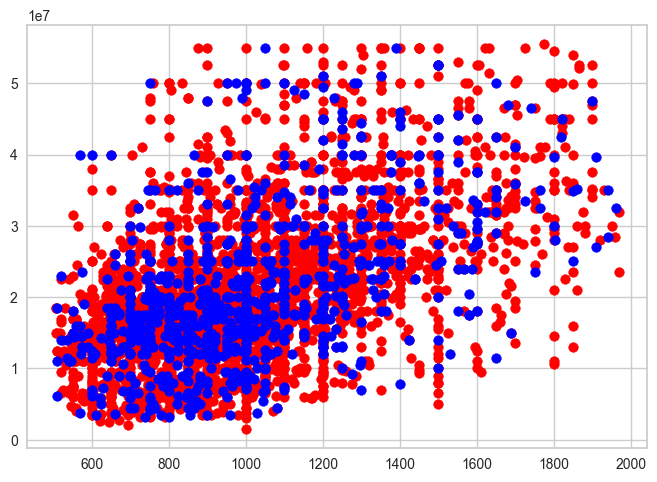

In [244]:
fig, ax = plt.subplots()
ax.scatter(X_train['area'],y_train, color = "red")

ax.scatter(X_test['area'],y_pred, color = "blue")

In [245]:
print(f'predict train: {r2_score(y_test, y_pred)}')
print(f'predict test: {r2_score(y_train, y_hat)}')

predict train: 0.41757031711428827
predict test: 1.0


In [246]:
param_grid = {
    'max_depth': [2,3,4, 5],
    'max_features': ["sqrt", "log2", None],
    'min_samples_leaf': [1, 3, 5],
    'min_samples_split': [2, 3, 4],
    'criterion': ["squared_error", "friedman_mse", "absolute_error", "poisson"],
    'splitter': ["best", "random"],
    'ccp_alpha': [1, 5, 10, 100, 1000, None]
}


rand_search = RandomizedSearchCV(estimator = DecisionTreeRegressor(), param_distributions = param_grid, cv = 10, verbose = 2, scoring='r2',  n_jobs = -1, n_iter=20)
rand_search.fit(X_train, y_train)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                   criterion='squared_error',
                                                   max_depth=None,
                                                   max_features=None,
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   random_state=None,
                                                   splitter='best'),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'ccp_alpha': [1, 5, 10, 100, 1000,
                                                      None],
                                        'criterion': ['squared_error',
                                                      'friedman_mse',
                                                      'absolute_error',
                                                      'poisson'],
                                        'max_depth': [2, 3, 4, 5],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 3, 5],
                                        'min_samples_split': [2, 3, 4],
                                        'splitter': ['best', 'random']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring='r2', verbose=2)

In [247]:
rand_search.best_params_

{'splitter': 'best',
 'min_samples_split': 3,
 'min_samples_leaf': 3,
 'max_features': None,
 'max_depth': 3,
 'criterion': 'squared_error',
 'ccp_alpha': 1000}

In [248]:
y_pred_train_optimized = rand_search.predict(X_train)
r2_score(y_train, y_pred_train_optimized)

0.5206991474161746

In [249]:
y_pred_optimized = rand_search.predict(X_test)
r2_score(y_test, y_pred_optimized)

0.45262729256008194

In [250]:
best_tree_regressor = rand_search.best_estimator_

In [251]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=40, test_size=0.3, random_state=0)
cv_results = cross_validate(
    best_tree_regressor, X, Y, cv=cv, scoring="r2"
)

In [252]:
cv_results = pd.DataFrame(cv_results)
cv_results['test_score'].mean()

0.4861538956493092

In [253]:
print(tree.export_text(best_tree_regressor))

|--- feature_1 <= 1159.50
|   |--- feature_2 <= 19.14
|   |   |--- feature_3 <= 72.86
|   |   |   |--- value: [26584462.81]
|   |   |--- feature_3 >  72.86
|   |   |   |--- value: [19037891.65]
|   |--- feature_2 >  19.14
|   |   |--- feature_2 <= 19.26
|   |   |   |--- value: [16299876.78]
|   |   |--- feature_2 >  19.26
|   |   |   |--- value: [7497000.00]
|--- feature_1 >  1159.50
|   |--- feature_2 <= 19.14
|   |   |--- feature_3 <= 72.85
|   |   |   |--- value: [38941304.35]
|   |   |--- feature_3 >  72.85
|   |   |   |--- value: [28984410.65]
|   |--- feature_2 >  19.14
|   |   |--- feature_2 <= 19.25
|   |   |   |--- value: [26250000.00]
|   |   |--- feature_2 >  19.25
|   |   |   |--- value: [13263064.52]



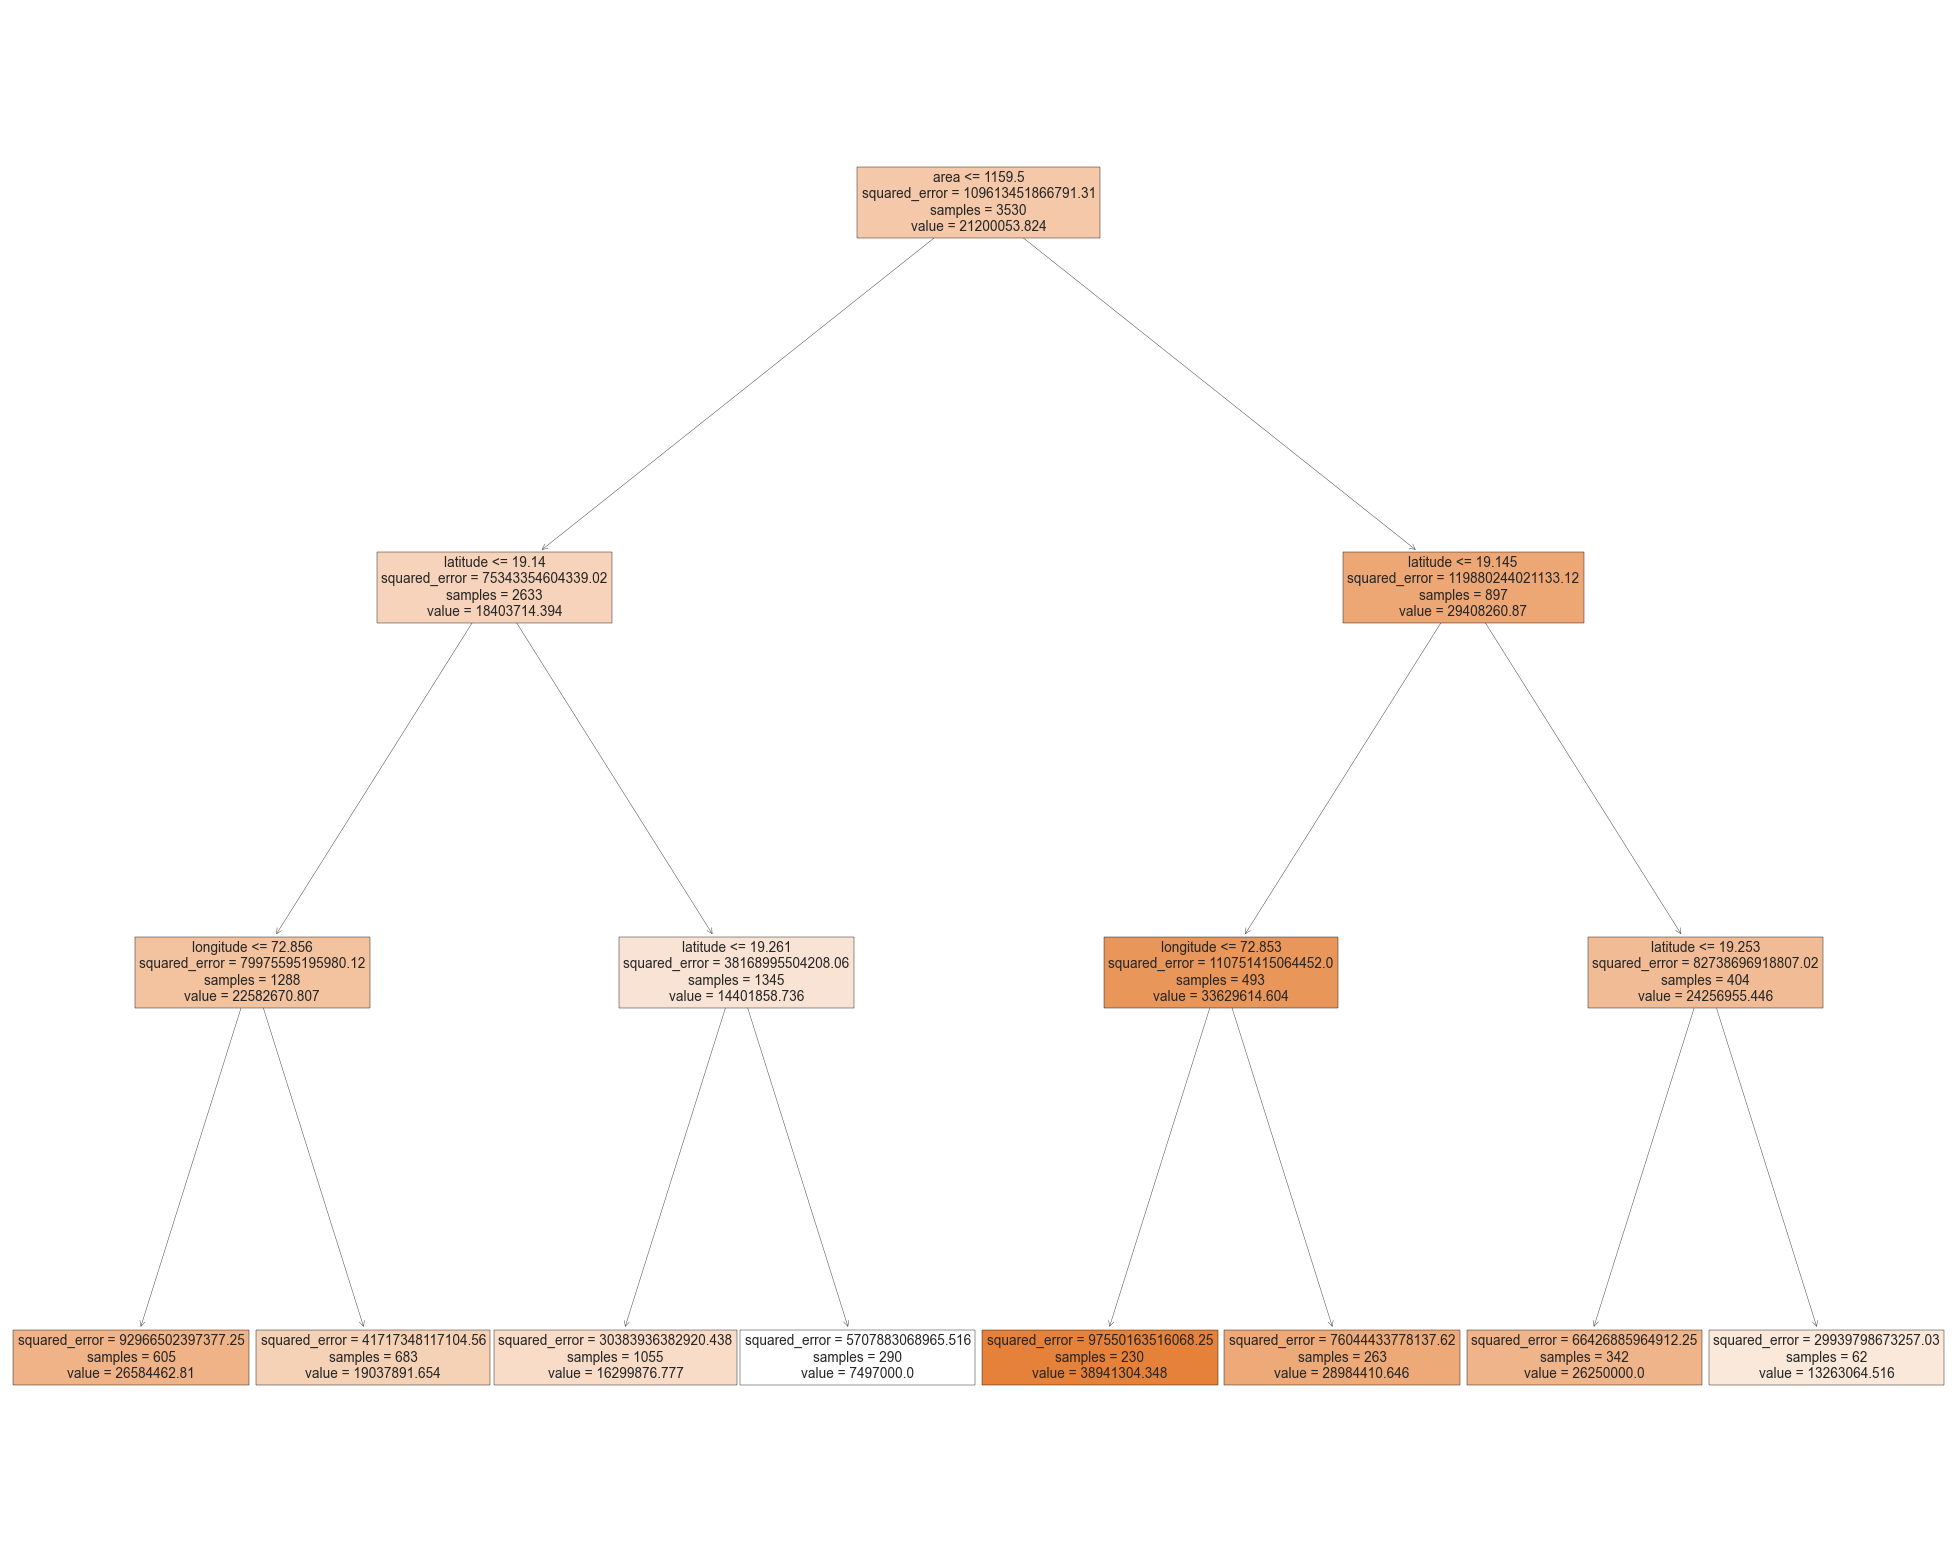

In [254]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(best_tree_regressor, feature_names=X.columns.to_list(), filled=True)

Классификация

In [300]:
data2= pd.read_csv('Dataset4_fil.csv')

In [256]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35098 entries, 0 to 35097
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0.1    35098 non-null  int64  
 1   Unnamed: 0      35098 non-null  int64  
 2   UTC             35098 non-null  int64  
 3   Temperature[C]  35098 non-null  float64
 4   Humidity[%]     35098 non-null  float64
 5   TVOC[ppb]       35098 non-null  float64
 6   eCO2[ppm]       35098 non-null  float64
 7   Raw H2          35098 non-null  float64
 8   Raw Ethanol     35098 non-null  int64  
 9   Pressure[hPa]   35098 non-null  float64
 10  PM1.0           35098 non-null  float64
 11  PM2.5           35098 non-null  float64
 12  NC0.5           35098 non-null  float64
 13  NC1.0           35098 non-null  float64
 14  NC2.5           35098 non-null  float64
 15  CNT             35098 non-null  int64  
 16  Fire Alarm      35098 non-null  int64  
dtypes: float64(11), int64(6)
memory

In [257]:
pd.crosstab(data2['Fire Alarm'],data2['Fire Alarm'], normalize='all')*100

Fire Alarm,0,1
Fire Alarm,,
0,13.601915,0.000000
1,0.000000,86.398085


In [258]:
data2.drop('Unnamed: 0',axis=1, inplace=True)

In [259]:
data2.drop('Unnamed: 0.1',axis=1, inplace=True)

In [260]:
from imblearn.over_sampling import RandomOverSampler 

In [301]:
y2 = data2['Fire Alarm'] 
X2 = data2.drop(['Fire Alarm'], axis=1) 

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size= 0.33, random_state=42)

In [262]:
encoder = ce.OrdinalEncoder(cols=['UTC','Temperature[C]','Humidity[%]', 'TVOC[ppb]' ,'eCO2[ppm]', 'Raw H2', 'Raw Ethanol', 'Pressure[hPa]', 'PM1.0', 'PM2.5', 'NC0.5', 'NC1.0', 'NC2.5', 'CNT'])
X_train2 = encoder.fit_transform(X_train2)
X_test2 = encoder.transform(X_test2)

In [263]:
y2.value_counts()

0    30324
1    30324
Name: Fire Alarm, dtype: int64

In [264]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
clf_gini.fit(X_train2, y_train2)
y_pred_test = clf_gini.predict(X_test2)

In [265]:
y_pred_train = clf_gini.predict(X_train2)

In [266]:
text_representation = tree.export_text(clf_gini)
print(text_representation)

|--- feature_13 <= 6272.50
|   |--- feature_4 <= 1.50
|   |   |--- feature_3 <= 275.50
|   |   |   |--- class: 0
|   |   |--- feature_3 >  275.50
|   |   |   |--- class: 0
|   |--- feature_4 >  1.50
|   |   |--- feature_1 <= 2.50
|   |   |   |--- class: 1
|   |   |--- feature_1 >  2.50
|   |   |   |--- class: 1
|--- feature_13 >  6272.50
|   |--- feature_13 <= 9426.50
|   |   |--- feature_4 <= 1.50
|   |   |   |--- class: 1
|   |   |--- feature_4 >  1.50
|   |   |   |--- class: 1
|   |--- feature_13 >  9426.50
|   |   |--- feature_13 <= 11989.50
|   |   |   |--- class: 1
|   |   |--- feature_13 >  11989.50
|   |   |   |--- class: 1



In [267]:
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test2, y_pred_test)))

Model accuracy score with criterion gini index: 0.7741


In [268]:
print(classification_report(y_test2, y_pred_test))

              precision    recall  f1-score   support

           0       0.74      0.86      0.79      9999
           1       0.83      0.69      0.75     10015

    accuracy                           0.77     20014
   macro avg       0.78      0.77      0.77     20014
weighted avg       0.78      0.77      0.77     20014



In [270]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train2, y_pred_train)))

Training-set accuracy score: 0.8473


In [271]:
print('Training set score: {:.4f}'.format(clf_gini.score(X_train2, y_train2)))
print('Test set score: {:.4f}'.format(clf_gini.score(X_test2, y_test2)))

Training set score: 0.8473
Test set score: 0.7741


[Text(0.5, 0.875, 'x[13] <= 6272.5\ngini = 0.5\nsamples = 40634\nvalue = [20325, 20309]'),
 Text(0.25, 0.625, 'x[4] <= 1.5\ngini = 0.392\nsamples = 24638\nvalue = [18036, 6602]'),
 Text(0.125, 0.375, 'x[3] <= 275.5\ngini = 0.293\nsamples = 21932\nvalue = [18027, 3905]'),
 Text(0.0625, 0.125, 'gini = 0.214\nsamples = 17518\nvalue = [15381, 2137]'),
 Text(0.1875, 0.125, 'gini = 0.48\nsamples = 4414\nvalue = [2646, 1768]'),
 Text(0.375, 0.375, 'x[1] <= 2.5\ngini = 0.007\nsamples = 2706\nvalue = [9, 2697]'),
 Text(0.3125, 0.125, 'gini = 0.391\nsamples = 15\nvalue = [4, 11]'),
 Text(0.4375, 0.125, 'gini = 0.004\nsamples = 2691\nvalue = [5, 2686]'),
 Text(0.75, 0.625, 'x[13] <= 9426.5\ngini = 0.245\nsamples = 15996\nvalue = [2289, 13707]'),
 Text(0.625, 0.375, 'x[4] <= 1.5\ngini = 0.423\nsamples = 6290\nvalue = [1910, 4380]'),
 Text(0.5625, 0.125, 'gini = 0.486\nsamples = 4567\nvalue = [1907, 2660]'),
 Text(0.6875, 0.125, 'gini = 0.003\nsamples = 1723\nvalue = [3, 1720]'),
 Text(0.875, 0.375

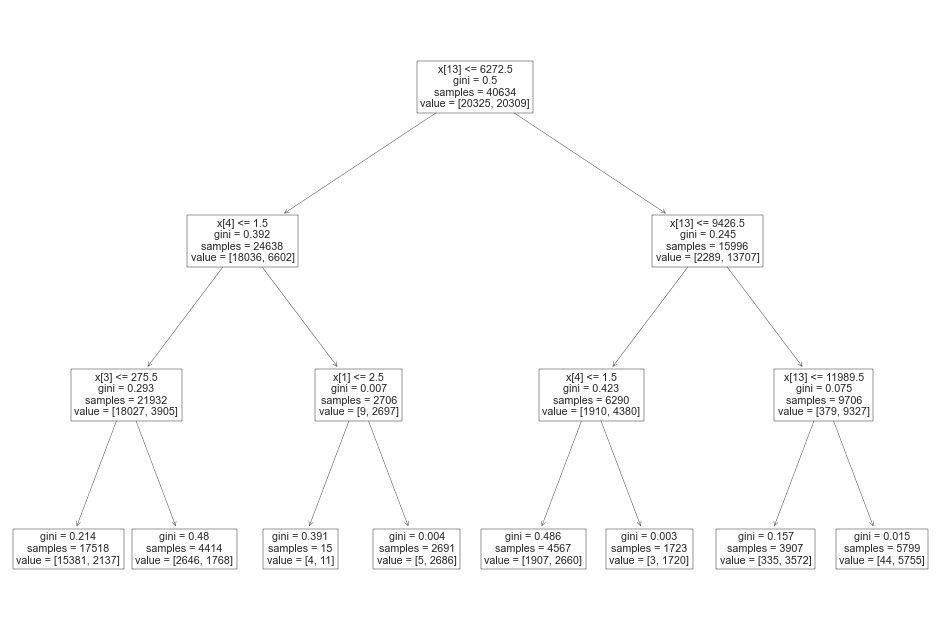

In [272]:
plt.figure(figsize=(12,8))

from sklearn import tree
tree.plot_tree(clf_gini.fit(X_train2, y_train2))

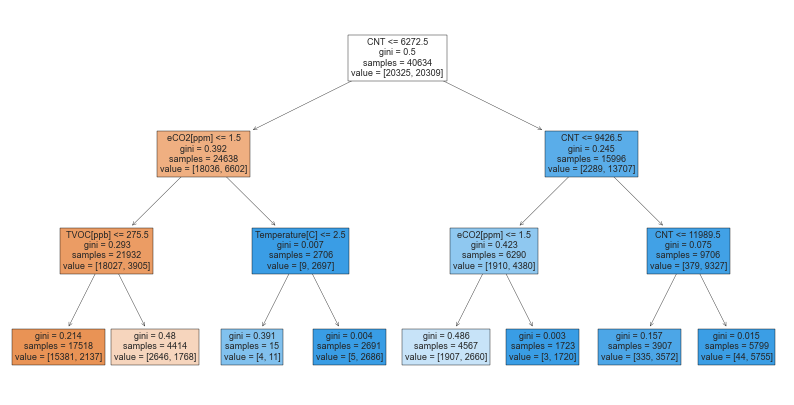

In [273]:
fig = plt.figure(figsize=(10,5))
_ = tree.plot_tree(clf_gini, feature_names=X_train2.columns, filled=True)

In [274]:
from pycaret.utils import version
from pycaret.regression import *
from pycaret.classification import *
version()

'3.2.0'

In [275]:
data1 = pd.read_csv('data/DataSet3.csv')

In [277]:
setup(data=data1,  target='price',ignore_features=['longitude', 'latitude'], categorical_features=['Status', 'neworold', 'Furnished_status', 'type_of_building'] )

ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

In [57]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [41]:
dt_reg = create_model(estimator='dt')

RuntimeError: This function/method requires the users to run setup() first.
More info: https://pycaret.gitbook.io/docs/get-started/quickstart

In [148]:
tuned_dt_reg = tune_model(dt_reg)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8641,0.8599,1.0000,0.8641,0.9271,0.0000,0.0000
1,0.8641,0.8640,1.0000,0.8641,0.9271,0.0000,0.0000
2,0.8641,0.8583,1.0000,0.8641,0.9271,0.0000,0.0000
3,0.8637,0.8757,1.0000,0.8637,0.9269,0.0000,0.0000
4,0.8637,0.8840,1.0000,0.8637,0.9269,0.0000,0.0000
5,0.8637,0.8656,1.0000,0.8637,0.9269,0.0000,0.0000
6,0.8637,0.8582,1.0000,0.8637,0.9269,0.0000,0.0000
7,0.8637,0.8629,1.0000,0.8637,0.9269,0.0000,0.0000
8,0.8641,0.8720,1.0000,0.8641,0.9271,0.0000,0.0000


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [278]:
df_py = data2.copy()

In [279]:
setup(data=df_py,  target='Fire Alarm',ignore_features=['Unnamed: 0', 'UTC'] , train_size=0.7, preprocess=True)

,Description,Value
0,Session id,4726
1,Target,Fire Alarm
2,Target type,Binary
3,Original data shape,"(35098, 15)"
4,Transformed data shape,"(35098, 14)"
5,Transformed train set shape,"(24568, 14)"
6,Transformed test set shape,"(10530, 14)"
7,Ignore features,2
8,Numeric features,13
9,Preprocess,True


In [120]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [121]:
dt = create_model(estimator='dt')
tuned_dt = tune_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.9992,0.9995,0.9991,1.0000,0.9995,0.9965,0.9965
6,0.9996,0.9985,1.0000,0.9995,0.9998,0.9983,0.9983
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.9992,0.9995,0.9991,1.0000,0.9995,0.9965,0.9965
6,0.9996,0.9985,1.0000,0.9995,0.9998,0.9983,0.9983
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


Ансамбли

In [64]:
##Boosting

In [122]:
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor

In [138]:
GBM_classifier = GradientBoostingClassifier(random_state=1000, learning_rate=0.1, max_depth=6)
GBM_classifier.fit(X_train2, y_train2)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=6,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=1000, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [125]:
GBM_Regressor = GradientBoostingRegressor(random_state=1000, learning_rate=0.1, max_depth=6)
GBM_Regressor.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='squared_error',
                          max_depth=6, max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_samples_leaf=1,
                          min_samples_split=2, min_weight_fraction_leaf=0.0,
                          n_estimators=100, n_iter_no_change=None,
                          random_state=1000, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [139]:
y_hat_GBC = GBM_classifier.predict(X_test2)
y_hat_GBR = GBM_Regressor.predict(X_test)

In [141]:
print('GBC Accuracy = {}'.format(accuracy_score(y_test2, y_hat_GBC)))
print('GBC f1 = {}'.format(f1_score(y_test2, y_hat_GBC)))

print('GBR MSE = {}'.format(mean_squared_error(y_test, y_hat_GBR)))
print('GBR R^2 = {}'.format(r2_score(y_test, y_hat_GBR)))

GBC Accuracy = 1.0
GBC f1 = 1.0
GBR MSE = 39338238906325.266
GBR R^2 = 0.6564848485296613


In [143]:
print(classification_report(y_test2,y_hat_GBC))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9999
           1       1.00      1.00      1.00     10015

    accuracy                           1.00     20014
   macro avg       1.00      1.00      1.00     20014
weighted avg       1.00      1.00      1.00     20014



In [ ]:
###Stacking

In [171]:
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import StackingClassifier
from sklearn.svm import LinearSVC

svm = make_pipeline(StandardScaler(), LinearSVC())
svm.fit(X_train2, y_train2)
y_pred = svm.predict(X_test2)

estimators = [('knn', knn), ('logistic_regression', log_regression),('Naive Bayes', gauss)]

In [172]:
sclf = StackingClassifier(estimators=estimators, final_estimator=svm)

In [173]:
y_sclf = sclf.fit(X_train2, y_train2)
y_sclf 

StackingClassifier(cv=None,
                   estimators=[('knn',
                                Pipeline(memory=None,
                                         steps=[('standardscaler',
                                                 StandardScaler(copy=True,
                                                                with_mean=True,
                                                                with_std=True)),
                                                ('kneighborsclassifier',
                                                 KNeighborsClassifier(algorithm='auto',
                                                                      leaf_size=30,
                                                                      metric='minkowski',
                                                                      metric_params=None,
                                                                      n_jobs=None,
                                                                      n_neighbors=5,
                                                                      p=2,
                                                                      weights='uniform'))],
                                         verbose=False)),
                               ('logistic_regression'...
                                            steps=[('standardscaler',
                                                    StandardScaler(copy=True,
                                                                   with_mean=True,
                                                                   with_std=True)),
                                                   ('linearsvc',
                                                    LinearSVC(C=1.0,
                                                              class_weight=None,
                                                              dual=True,
                                                              fit_intercept=True,
                                                              intercept_scaling=1,
                                                              loss='squared_hinge',
                                                              max_iter=1000,
                                                              multi_class='ovr',
                                                              penalty='l2',
                                                              random_state=None,
                                                              tol=0.0001,
                                                              verbose=0))],
                                            verbose=False),
                   n_jobs=None, passthrough=False, stack_method='auto',
                   verbose=0)

In [174]:
y_sclf.score(X_test2, y_test2)

0.8607474767662636

In [176]:
y_pred_c = y_sclf.predict(X_test2)

In [178]:
print('StC Accuracy = {}'.format(accuracy_score(y_test2, y_pred_c)))
print('StC f1 = {}'.format(f1_score(y_test2, y_pred_c)))

StC Accuracy = 0.8607474767662636
StC f1 = 0.8478628746110596


In [147]:
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso

from sklearn.ensemble import StackingRegressor

elastic_net = make_pipeline(RobustScaler(), ElasticNet(alpha=0.1)) 
lasso = make_pipeline(RobustScaler(), Lasso(alpha=0.1))

estimators = [ ('elastic_net', elastic_net),('decision_tree_regressor', best_tree_regressor) ]

In [148]:
sclf_r = StackingRegressor(estimators=estimators,final_estimator=lasso)

In [149]:
y_sclf_r = sclf_r.fit(X_train, y_train)
y_sclf_r 

StackingRegressor(cv=None,
                  estimators=[('elastic_net',
                               Pipeline(memory=None,
                                        steps=[('robustscaler',
                                                RobustScaler(copy=True,
                                                             quantile_range=(25.0,
                                                                             75.0),
                                                             unit_variance=False,
                                                             with_centering=True,
                                                             with_scaling=True)),
                                               ('elasticnet',
                                                ElasticNet(alpha=0.1,
                                                           copy_X=True,
                                                           fit_intercept=True,
                                                           l1_ratio=0.5,
                                                           max_iter=1000,
                                                           positive=False,
                                                           precompute=False,
                                                           random_state=None,...
                                           steps=[('robustscaler',
                                                   RobustScaler(copy=True,
                                                                quantile_range=(25.0,
                                                                                75.0),
                                                                unit_variance=False,
                                                                with_centering=True,
                                                                with_scaling=True)),
                                                  ('lasso',
                                                   Lasso(alpha=0.1, copy_X=True,
                                                         fit_intercept=True,
                                                         max_iter=1000,
                                                         positive=False,
                                                         precompute=False,
                                                         random_state=None,
                                                         selection='cyclic',
                                                         tol=0.0001,
                                                         warm_start=False))],
                                           verbose=False),
                  n_jobs=None, passthrough=False, verbose=0)

In [150]:
y_sclf_r.score(X_test, y_test)

0.5440021078045716

In [152]:
print('StR MSE = {}'.format(mean_squared_error(y_test, y_pred_r)))
print('StR R^2 = {}'.format(r2_score(y_test, y_pred_r)))

StR MSE = 52219396865565.64
StR R^2 = 0.5440021078045716


In [ ]:
###Bagging

In [153]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import BaggingRegressor

In [165]:
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from statistics import mode

knn = make_pipeline(StandardScaler(), KNeighborsClassifier())
knn.fit(X_train2, y_train2)
y_pred = knn.predict(X_test2)

gauss = make_pipeline( GaussianNB())
gauss.fit(X_train2, y_train2)
y_pred = gauss.predict(X_test2)

log_regression = make_pipeline(StandardScaler(), LogisticRegression())
log_regression.fit(X_train2, y_train2)
y_pred = log_regression.predict(X_test2)

In [166]:
def bagging_predictions(estimator):
    bagg_c = BaggingClassifier(base_estimator=estimator,
                            n_estimators=10,
                            max_samples=1.0,
                            bootstrap=True, # Samples are drawn with replacement
                            n_jobs= -1,
                            random_state= 43).fit(X_train2, y_train2)

    bagg_c_pred = bagg_c.predict(X_test2)
    return bagg_c_pred

In [167]:
predictions = np.column_stack((bagging_predictions(knn), # составляет их столбами поэлементно
                              bagging_predictions(gauss),
                              bagging_predictions(log_regression)))
y_pred = [mode(x) for x in predictions]

In [168]:
print('Bagg_c Accuracy = {}'.format(accuracy_score(y_test2, y_pred)))
print('Bagg_c f1 = {}'.format(f1_score(y_test2, y_pred)))

Bagg_c Accuracy = 0.8100329769161587
Bagg_c f1 = 0.7798494499131441


In [160]:
from sklearn.linear_model import LinearRegression
from sklearn.kernel_ridge import KernelRidge

linear = make_pipeline(LinearRegression())
kernel_ridge = make_pipeline(RobustScaler(), KernelRidge(alpha=0.5, kernel="polynomial", degree=2, coef0=2.5))

In [157]:
def bagging_predictions(estimator):
    bagg_r = BaggingRegressor(base_estimator=estimator,
                            n_estimators=10,
                            max_samples=1.0,
                            bootstrap=True, # Samples are drawn with replacement
                            n_jobs= -1,
                            random_state= 43).fit(X_train, y_train)

    bagg_r_pred = bagg_r.predict(X_test)
    return bagg_r_pred

In [162]:
predictions = np.column_stack((bagging_predictions(linear), # составляет их столбами поэлементно
                              bagging_predictions(lasso),
                              bagging_predictions(elastic_net),
                              bagging_predictions(kernel_ridge),
                              bagging_predictions(best_tree_regressor)))
y_pred = np.mean(predictions, axis=1)

In [163]:
print('Bagg_r MSE = {}'.format(mean_squared_error(y_test, y_pred)))
print('Bagg_r R^2 = {}'.format(r2_score(y_test, y_pred)))

Bagg_r MSE = 50680492144476.69
Bagg_r R^2 = 0.5574403577888203


Библиотеки

In [ ]:
###catBoost

In [284]:
# %pip install catboost

In [201]:
from catboost import CatBoostRegressor
from catboost import CatBoostClassifier

In [285]:
categorical = {key:X.dtypes[key] for key in X.dtypes.to_dict() if key not in  {'area', 'latitude', 'longitude'}}
categorical = pd.Series(categorical)

cat_indices = [i for i in range(len(X.dtypes)) if X.columns[i] not in {'area', 'latitude', 'longitude', 'Furnished_status'}]

In [286]:
catboost_regressor = CatBoostRegressor(iterations=50, loss_function='RMSE')

In [287]:
catboost_class = CatBoostClassifier(loss_function='Logloss', random_state=42)

In [280]:
X_train

,Unnamed: 0,area,latitude,longitude,Bedrooms,Bathrooms,Balcony,Status,neworold,parking,Furnished_status,Lift,type_of_building_Flat,type_of_building_Individual House
321,485,1700.0,19.180237,72.855415,3,3,1,True,False,1,0.5,1,1,0
3775,5420,1100.0,19.053274,72.893486,2,2,0,True,False,0,0.0,0,1,0
2707,3898,1026.0,19.167328,72.934784,2,2,0,True,True,0,0.0,0,1,0
655,962,950.0,19.115297,72.839762,2,2,0,True,False,0,0.0,0,1,0
4342,6169,700.0,19.201590,72.818820,2,2,0,True,False,0,0.5,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3444,4931,915.0,19.119677,72.905081,2,2,0,True,False,0,0.0,0,1,0
466,696,805.0,19.191842,72.834581,2,2,0,True,True,0,0.0,0,1,0
3092,4442,1470.0,19.006390,72.828689,3,3,0,True,False,0,0.0,0,1,0
3772,5417,820.0,19.019547,72.838255,2,2,0,True,False,0,1.0,0,1,0


In [288]:
catboost_regressor.fit(    
     X_train,
     y_train,
     cat_features=cat_indices,
     eval_set=(X_test, y_test),
     verbose=False,
     plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [289]:
catboost_class.fit(    
     X_train2,
     y_train2,
     eval_set=(X_test2, y_test2),
     verbose=False,
     plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [298]:
y_pred = catboost_regressor.predict(X_test)
r2 = r2_score(y_pred, y_test)
r2

0.49625053769799854

In [302]:
y_pred = catboost_class.predict(X_test2)
y_pred = [bool(value) for value in y_pred]

print('Accuracy = {}'.format(accuracy_score(y_test2, y_pred)))
print('f1 = {}'.format(f1_score(y_test2, y_pred)))

Accuracy = 0.5003997201958629
f1 = 0.6670218788504446


In [187]:
%pip install xgboost 

Note: you may need to restart the kernel to use updated packages.


In [291]:
import xgboost as xgb
from xgboost import XGBClassifier

In [292]:
xgb_regressor= xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213,verbosity=0, nthread = -1, random_state = 42)

In [293]:
X_train2 = X_train2.rename(
    columns = {"Temperature[C]": "Temperature", 'Humidity[%]':'Humidity', 'TVOC[ppb]': 'TVOC',
               'eCO2[ppm]': 'eCO2', 'Pressure[hPa]': "Pressure"}
)
X_test2 = X_test2.rename(
    columns = {"Temperature[C]": "Temperature", 'Humidity[%]':'Humidity', 'TVOC[ppb]': 'TVOC',
               'eCO2[ppm]': 'eCO2', 'Pressure[hPa]': "Pressure"}
)

In [294]:
xgb_classifier= xgb.XGBClassifier(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213,verbosity=0, nthread = -1, random_state = 42)
xgb_classifier.fit(X_train2, y_train2)

XGBClassifier(alpha=0.464, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.4603, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.0468, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=1.7817, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=2200, n_jobs=None, nthread=-1, ...)

In [295]:
xgb_regressor.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.4603, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.0468, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=1.7817, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=2200, n_jobs=None, nthread=-1,
             num_parallel_tree=None, ...)

In [296]:
y_pred = xgb_regressor.predict(X_test)
r2 = r2_score(y_pred, y_test)
r2

0.48935301520847097

In [297]:
y_pred = xgb_classifier.predict(X_test2)
print('Accuracy = {}'.format(accuracy_score(y_test2, y_pred)))
print('f1 = {}'.format(f1_score(y_test2, y_pred)))

Accuracy = 0.9888577995403218
f1 = 0.988771965157847


In [216]:
import lightgbm as lgb
from lightgbm import LGBMClassifier

In [198]:
lgbm_regressor= lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11,random_state = 43)

In [206]:
X_train.columns

Index(['Unnamed: 0', 'area', 'latitude', 'longitude', 'Bedrooms', 'Bathrooms',
       'Balcony', 'Status', 'neworold', 'parking', 'Furnished_status', 'Lift',
       'type_of_building_Flat', 'type_of_building_Individual House'],
      dtype='object')

In [228]:
X_train = X_train.rename(
    columns = {'Unnamed: 0':'Unnamed0'}
)
X_test = X_test.rename(
    columns = {'Unnamed: 0':'Unnamed0'}
)

In [229]:
lgbm_regressor.fit(X_train, y_train)

[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, m

LGBMRegressor(bagging_fraction=0.8, bagging_freq=5, bagging_seed=9,
              boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              feature_fraction=0.2319, feature_fraction_seed=9,
              importance_type='split', learning_rate=0.05, max_bin=55,
              max_depth=-1, min_child_samples=20, min_child_weight=0.001,
              min_data_in_leaf=6, min_split_gain=0.0,
              min_sum_hessian_in_leaf=11, n_estimators=720, n_jobs=None,
              num_leaves=5, objective='regression', random_state=43,
              reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
              subsample_for_bin=200000, subsample_freq=0)

In [230]:
y_pred = lgbm_regressor.predict(X_test)
r2 = r2_score(y_test, y_pred)
r2

[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


0.6221554052520888

In [219]:
X_train2.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'UTC', 'Temperature', 'Humidity', 'TVOC',
       'eCO2', 'Raw H2', 'Raw Ethanol', 'Pressure', 'PM1.0', 'PM2.5', 'NC0.5',
       'NC1.0', 'NC2.5', 'CNT'],
      dtype='object')

In [222]:
X_train2 = X_train2.rename(
    columns = {"Unnamed: 0.1": "Unnamed01", 'Unnamed: 0':'Unnamed0'}
)
X_test2 = X_test2.rename(
    columns = {"Unnamed: 0.1": "Unnamed01", 'Unnamed: 0':'Unnamed0'}
)

In [223]:
lgbm_class= lgb.LGBMClassifier()
lgbm_class.fit(X_train2, y_train2)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 20309, number of negative: 20325
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001191 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3741
[LightGBM] [Info] Number of data points in the train set: 40634, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499803 -> initscore=-0.000788
[LightGBM] [Info] Start training from score -0.000788


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=None, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

In [227]:
y_pred = lgbm_class.predict(X_test2)
print('Accuracy = {}'.format(accuracy_score(y_test2, y_pred)))
print('f1 = {}'.format(f1_score(y_test2, y_pred)))

Accuracy = 0.9997002098531028
f1 = 0.9997004194128221


CART

In [ ]:
from abc import ABC,abstractmethod
from typing import Tuple

In [ ]:
class CART:
    """
    Реализация алгоритма дерева решений (CART).

    Параметры:
    - task_type (str): Тип задачи, 'classification' для классификации, 'regression' для регрессии.
    - max_depth (int): Максимальная глубина дерева. Если None, дерево строится до исчерпания данных.
    - min_samples_split (int): Минимальное количество образцов, необходимых для разделения внутреннего узла.

    Методы:
    - fit(X, y): Обучает модель на обучающих данных X и метках y.
    - predict(X): Прогнозирует метки для новых данных X.

    """

    def __init__(self, task_type='classification', max_depth=None, min_samples_split=2):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.task_type = task_type
        if task_type == 'classification':
            self.impurity_func = lambda x, y: self._gini(x, y)
        elif task_type == 'regression':
            self.impurity_func = lambda x, y: self._mse(x, y)
        else:
            raise ValueError("Неправильный выбор операции!")

    def fit(self, X, y):
        self.root = self._build_tree(X, y, depth=0)

    def _build_tree(self, X, y, depth):
        if (self.max_depth is not None and depth >= self.max_depth) or len(X) <= self.min_samples_split:
            leaf_value = np.mean(y) if self.task_type == 'regression' else np.argmax(np.bincount(y)) # возвращает массив с кол-вом каждого числа в массиве начиная с 0
            return {'leaf': True, 'value': leaf_value}

        best_feature, best_threshold = self._find_best_split(X, y)

        if best_feature is None or best_threshold is None:
            leaf_value = np.mean(y) if self.task_type == 'regression' else np.argmax(np.bincount(y))
            return {'leaf': True, 'value': leaf_value}

        left_child_indices = X[:, best_feature] <= best_threshold
        right_child_indices = X[:, best_feature] > best_threshold

        node = {
            'feature': best_feature,
            'threshold': best_threshold,
            'left': self._build_tree(X[left_child_indices], y[left_child_indices], depth + 1),
            'right': self._build_tree(X[right_child_indices], y[right_child_indices], depth + 1)
        }

        return node

    def _find_best_split(self, X, y):
        best_impurity = float('inf') if self.task_type == 'regression' else 1.0
        best_feature = None
        best_threshold = None

        for feature in range(X.shape[1]):
            thresholds = np.unique(X[:, feature])
            for threshold in thresholds:
                left_indices = X[:, feature] <= threshold
                right_indices = X[:, feature] > threshold

                impurity = self.impurity_func(y[left_indices], y[right_indices])

                if impurity < best_impurity:
                    best_impurity = impurity
                    best_feature = feature
                    best_threshold = threshold

        return best_feature, best_threshold

    def _gini(self, left_y, right_y):
        left_gini = 1 - np.sum((np.bincount(left_y) / len(left_y))**2)
        right_gini = 1 - np.sum((np.bincount(right_y) / len(right_y))**2)
        gini = (len(left_y) * left_gini + len(right_y) * right_gini) / (len(left_y) + len(right_y))
        return gini

    def _mse(self, left_y, right_y):
        left_mse = np.mean((left_y - np.mean(left_y))**2)
        right_mse = np.mean((right_y - np.mean(right_y))**2)
        mse = (len(left_y) * left_mse + len(right_y) * right_mse) / (len(left_y) + len(right_y))
        return mse

    def predict(self, X):
        return np.array([self._traverse_tree(x, self.root) for x in X])

    def _traverse_tree(self, x, node):
        if 'leaf' in node:
            return node['value']

        if x[node['feature']] <= node['threshold']:
            return self._traverse_tree(x, node['left'])
        else:
            return self._traverse_tree(x, node['right'])

In [ ]:
#classif

In [ ]:
data = pd.read_csv('data/DataSet4.csv')
data = data.drop(['Unnamed: 0'], axis=1)
data = data.drop(['Unnamed: 0.1'], axis=1)
data = data.drop('UTC', axis=1)

mean_group = ["TVOC[ppb]", "eCO2[ppm]", "PM2.5", 
              "NC1.0", "Humidity[%]", "Temperature[C]",
                "Raw H2", "Pressure[hPa]"]

for field in mean_group:
    data[field] = data[field].fillna(data[field].mean())

dict_firealarm = {"Yes": True, "No": False}
data["Fire Alarm"] = data["Fire Alarm"].map(dict_firealarm)

y = data['Fire Alarm'] # filtered_
X = data.drop(['Fire Alarm'], axis=1) #filtered_

X, y = RandomOverSampler(random_state=42).fit_resample(X, y) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42)

In [ ]:
classificator = CART(task_type='classification', max_depth=4, min_samples_split=5)
classificator.fit(X_train.values, y_train)
y_pred = classificator.predict(X_test.values)
print('Accuracy = {}'.format(accuracy_score(y_test, y_pred)))
print('f1 = {}'.format(f1_score(y_test, y_pred)))

In [ ]:
#Regres

In [ ]:
data = pd.read_csv('DataSet3_fil.csv')

float_to_int = {"Bedrooms", "Bathrooms", "Balcony", "parking", "Lift"}
for field in float_to_int: 
    data[field] = data[field].astype(int)

dict_neworold = {"New Property": True, "Resale": False}
data["neworold"] = data["neworold"].map(dict_neworold)

dict_status = {"Ready to Move": True, "Under Construction": False}
data["Status"] = data["Status"].map(dict_status)

dict_furnished = {"Semi-Furnished": 0.5, "Furnished": 1, "Unfurnished": 0} 
data["Furnished_status"] = data["Furnished_status"].map(dict_furnished)

numeric_data = data.select_dtypes(exclude='object')
object_data = data.select_dtypes(include='object')
data_objects_dummies = pd.get_dummies(object_data)
final_data = pd.concat([numeric_data,data_objects_dummies], axis=1)

y = final_data['price']
X = final_data.drop(['price'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 

In [ ]:
regressor = CART(task_type='regression', max_depth=4)
regressor.fit(X_train.values, y_train)
y_pred = regressor.predict(X_test.values)
r2_score(y_pred, y_test)